In [1]:
import pandas as pd

df = pd.read_csv("Diabetes_and_LifeStyle_Dataset.csv")
df.head()


,Age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,52,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [2]:
df.shape


(97297, 31)

In [3]:
df.isnull().sum()


Age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


In [4]:
# select numeric columns only
X = df.select_dtypes(include=['int64', 'float64'])

X.shape


(97297, 24)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape



(97297, 24)

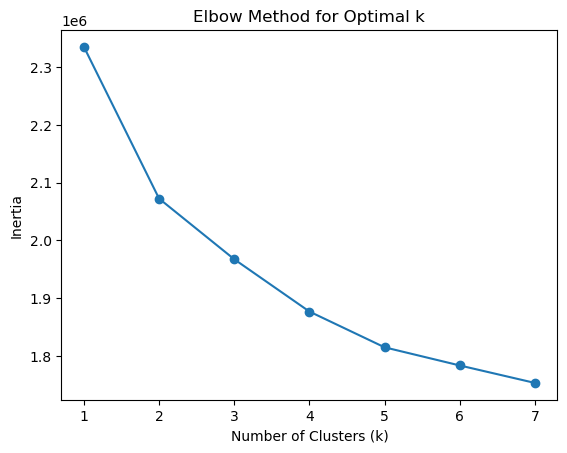

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 8), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [7]:
k = 3


In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

clusters[:10]


array([2, 1, 2, 2, 2, 0, 0, 2, 2, 0], dtype=int32)

In [9]:
df['cluster'] = clusters
df[['cluster']].head()


,cluster
0,2
1,1
2,2
3,2
4,2


In [11]:
df.groupby('cluster').mean(numeric_only=True)



,Age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
cluster,,,,,,,,,,,,,,,,,,,,,
0,51.923896,2.018427,126.150033,5.866109,6.995990,5.898920,0.099469,0.266382,0.081706,26.878433,...,197.078168,52.591509,115.098327,129.774674,102.751824,134.508845,9.941519,5.819616,29.357139,0.138866
1,41.363531,1.976237,132.529001,6.399321,6.999418,5.988885,0.123731,0.188749,0.051148,22.869861,...,165.069479,57.527934,79.730650,102.612027,105.933075,153.125186,7.012199,6.304343,23.710113,0.513029
2,55.956006,2.017256,103.247496,5.765919,6.997548,6.071307,0.378406,0.289221,0.099253,26.905602,...,194.800041,52.300793,112.978207,130.584482,121.001172,183.085438,10.073654,7.175249,35.953972,0.987587
